# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])

In [2]:
learning_rate = 0.01
training_steps = 1000

In [3]:
X = np.random.randn(50)
Y = 2*X + np.random.randn(50)

In [5]:
W = tf.Variable(np.random.randn(), name="Weight")
b = tf.Variable(np.random.randn(), name='bias')

def linear_regression(x):
  return W * x + b

def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [22]:
def run_optimization():
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
  
  gradients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))


In [25]:
for step in range(1, training_steps):
  run_optimization()

  if step % 50 == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: {:4d}\tloss: {:.4f}\tW: {:.4f}\tb: {:.4f}".format(step, loss, W.numpy(), b.numpy()))


step:   50	loss: 1.2179	W: 1.6231	b: -0.2349
step:  100	loss: 1.1542	W: 1.7941	b: -0.1940
step:  150	loss: 1.1371	W: 1.8799	b: -0.1638
step:  200	loss: 1.1324	W: 1.9239	b: -0.1451
step:  250	loss: 1.1311	W: 1.9467	b: -0.1343
step:  300	loss: 1.1308	W: 1.9586	b: -0.1282
step:  350	loss: 1.1307	W: 1.9649	b: -0.1249
step:  400	loss: 1.1306	W: 1.9682	b: -0.1232
step:  450	loss: 1.1306	W: 1.9699	b: -0.1222
step:  500	loss: 1.1306	W: 1.9709	b: -0.1217
step:  550	loss: 1.1306	W: 1.9713	b: -0.1214
step:  600	loss: 1.1306	W: 1.9716	b: -0.1213
step:  650	loss: 1.1306	W: 1.9717	b: -0.1212
step:  700	loss: 1.1306	W: 1.9718	b: -0.1212
step:  750	loss: 1.1306	W: 1.9718	b: -0.1212
step:  800	loss: 1.1306	W: 1.9719	b: -0.1211
step:  850	loss: 1.1306	W: 1.9719	b: -0.1211
step:  900	loss: 1.1306	W: 1.9719	b: -0.1211
step:  950	loss: 1.1306	W: 1.9719	b: -0.1211


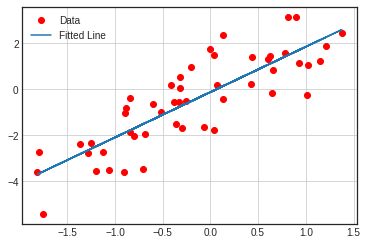

In [26]:
plt.plot(X,Y, 'ro', label ='Data')
plt.plot(X, np.array(W* X + b), label='Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [27]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [28]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [56]:
a = tf.Variable(np.random.randn())
b= tf.Variable(np.random.randn())
c= tf.Variable(np.random.randn())

In [31]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

0.7011624
0.2225701
0.8440218


### 데이터 지정

In [57]:
X = np.random.randn(50)
Y  = X**2 + X * np.random.randn(50)

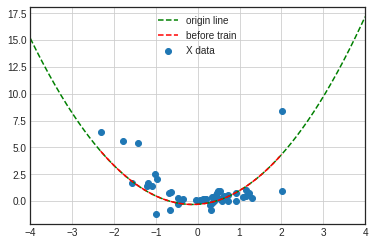

In [61]:
line_x = np.arange(min(X),  max(X), 0.001)
line_y = a * line_x**2 + b*line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='before train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()


### Util Functions

In [59]:
def compute_loss():
  pred_y = a * (np.array(X)**2) + b * np.array(X) + c
  loss = tf.reduce_mean((Y - pred_y)**2)
  return loss

### Optimizer

In [62]:
optimizer = Adam(learning_rate=learning_rate)

### 학습

In [63]:
for epoch in range(1, epochs):
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  if epoch % 100 == 0:
    print('Epoch: {:4d}\ta: {:.4f}\tb: {:.4f}\tc: {:.4f}'.format(epoch, a.numpy(), b.numpy(), c.numpy()))

Epoch:  100	a: 1.1887	b: -0.2879	c: -0.0972
Epoch:  200	a: 1.1871	b: -0.2874	c: -0.0948
Epoch:  300	a: 1.1871	b: -0.2874	c: -0.0948
Epoch:  400	a: 1.1871	b: -0.2874	c: -0.0948
Epoch:  500	a: 1.1871	b: -0.2874	c: -0.0948
Epoch:  600	a: 1.1871	b: -0.2874	c: -0.0948
Epoch:  700	a: 1.1871	b: -0.2874	c: -0.0948
Epoch:  800	a: 1.1871	b: -0.2874	c: -0.0948
Epoch:  900	a: 1.1871	b: -0.2874	c: -0.0948


### 학습 후의 회귀선

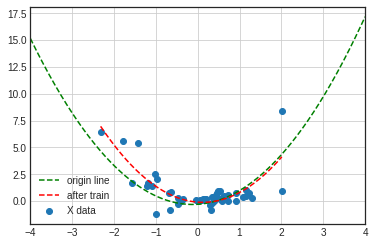

In [64]:
line_x = np.arange(min(X),  max(X), 0.001)
line_y = a * line_x**2 + b*line_x + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='after train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [86]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [87]:
num_classes = 10

num_features = 784


learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [88]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train /255., x_test / 255.

### tf.data API 사용
- 03 에서 다시 다룸 

In [89]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [90]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b= tf.Variable(tf.zeros([num_classes]), name='bias')

### Util Functions

In [91]:
def logistic_regression(x):
  return tf.nn.softmax(tf.matmul(x,W) + b)

def cross_entropy_error(pred_y, true_y):
  true_y = tf.one_hot(true_y, depth=num_classes)
  pred_y = tf.clip_by_value(pred_y, 1e-9, 1.)

  return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [92]:
optimizer  = tf.optimizers.SGD(learning_rate)

In [93]:
def run_optimization(x, y):
  with tf.GradientTape() as tape:
    pred = logistic_regression(x)
    loss = cross_entropy_error(pred, y)
  
  gradients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

### 학습 진행

In [94]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
  run_optimization(batch_x, batch_y)

  if step  % 50 == 0:
    pred = logistic_regression(batch_x)
    loss = cross_entropy_error(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print("step: {:4d}\tloss: {:.4f}\tAccuracy: {:.4f}".format(step, loss, acc))

step:   50	loss: 7.7343	Accuracy: 0.2383
step:  100	loss: 6.0617	Accuracy: 0.3438
step:  150	loss: 3.5799	Accuracy: 0.4531
step:  200	loss: 2.7136	Accuracy: 0.5469
step:  250	loss: 1.8081	Accuracy: 0.6797
step:  300	loss: 1.7589	Accuracy: 0.6875
step:  350	loss: 1.5125	Accuracy: 0.6992
step:  400	loss: 1.4975	Accuracy: 0.6875
step:  450	loss: 1.3369	Accuracy: 0.7383
step:  500	loss: 1.5676	Accuracy: 0.7109
step:  550	loss: 0.9757	Accuracy: 0.7812
step:  600	loss: 1.2967	Accuracy: 0.7227
step:  650	loss: 1.1743	Accuracy: 0.7344
step:  700	loss: 1.1919	Accuracy: 0.7852
step:  750	loss: 1.3166	Accuracy: 0.7773
step:  800	loss: 0.9626	Accuracy: 0.7930
step:  850	loss: 1.2755	Accuracy: 0.7539
step:  900	loss: 1.0484	Accuracy: 0.7930
step:  950	loss: 0.8284	Accuracy: 0.8281
step: 1000	loss: 0.7801	Accuracy: 0.8125


###  테스트

In [95]:
pred = logistic_regression(x_test)
print("Test Accuracy: {}".format(accuracy(pred, y_test)))

Test Accuracy: 0.8125


### 시각화

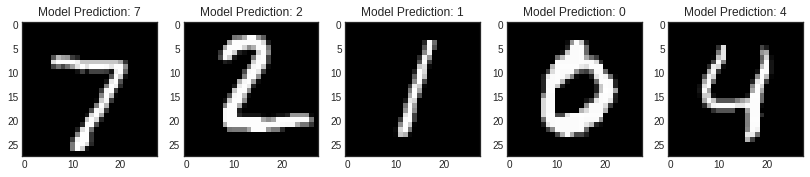

In [98]:
num_images = 5
test_images= x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize=(14,8))

for i in range(1, num_images+1, 1):
  plt.subplot(1, num_images, i)
  plt.imshow(np.reshape(test_images[i-1], [28, 28]), cmap='gray')
  plt.title("Model Prediction: {}".format(np.argmax(predictions.numpy()[i-1])))

plt.show()